In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("data/enron_clean.csv")
df.head()

,text,label
0,any software just for understanding oem softwa...,1
1,perspective on ferc regulatory action client c...,0
2,wanted to try ci lis but thought it was way to...,1
3,enron hpl actuals for december teco tap enron ...,0
4,looking for cheap high quality software rotate...,1


In [8]:
# Basic info
print("Rows:", len(df))
print("Columns:", df.columns.tolist())
print(df.isna().sum())

Rows: 27464
Columns: ['text', 'label']
text     2
label    0
dtype: int64


In [10]:
# Class balance
print("\nClass balance:")
print(df['label'].value_counts())


Class balance:
label
1    13786
0    13678
Name: count, dtype: int64


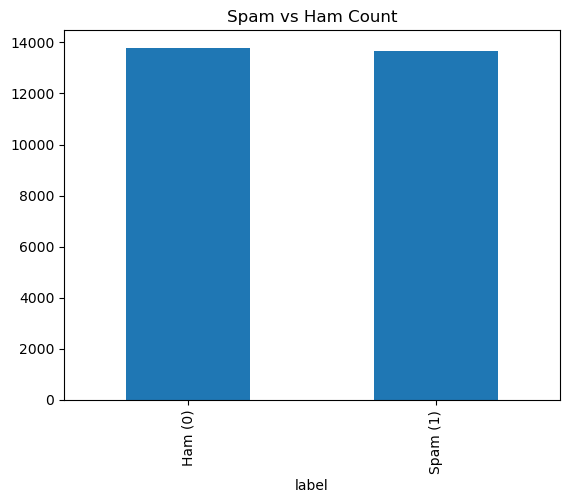

In [12]:
df['label'].value_counts().plot(kind='bar')
plt.title("Spam vs Ham Count")
plt.xticks([0,1], ["Ham (0)", "Spam (1)"])
plt.show()

In [14]:
# Sample emails
print("\nSample Spam Emails:")
print(df[df['label']==1]['text'].head())


Sample Spam Emails:
0    any software just for understanding oem softwa...
2    wanted to try ci lis but thought it was way to...
4    looking for cheap high quality software rotate...
5    emerging growth stock profile vera vcsc brand ...
6    internet provider abuse i noticed that you hav...
Name: text, dtype: object


In [16]:
print("\nSample Ham Emails:")
print(df[df['label']==0]['text'].head())


Sample Ham Emails:
1     perspective on ferc regulatory action client c...
3     enron hpl actuals for december teco tap enron ...
8     fortune most admired ranking congratulations f...
12    re risk position eugenio perez thanks forwarde...
13    enron mentions enron seeks money for trading u...
Name: text, dtype: object



Text Length Stats:
 count     27464.000000
mean       1330.059096
std        3816.625361
min           2.000000
25%         309.000000
50%         622.000000
75%        1367.000000
max      205238.000000
Name: length, dtype: float64


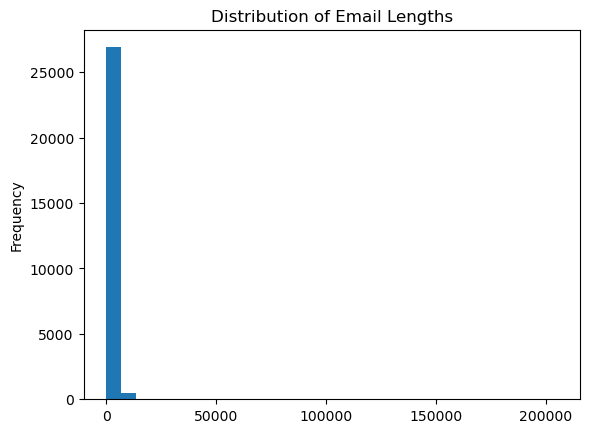

In [24]:
# Text length
df['text'] = df['text'].astype(str)  # convert everything to string first
df['length'] = df['text'].apply(len)

print("\nText Length Stats:\n", df['length'].describe())

df['length'].plot(kind='hist', bins=30)
plt.title("Distribution of Email Lengths")
plt.show()


In [26]:
# Top words (simple)
from collections import Counter

def get_top_words(texts, n=15):
    all_words = " ".join(texts).split()
    counter = Counter(all_words)
    return counter.most_common(n)


In [30]:
print("\nTop words in SPAM:")
print(get_top_words(df[df['label']==1]['text']))

print("\nTop words in HAM:")
print(get_top_words(df[df['label']==0]['text']))



Top words in SPAM:
[('the', 87583), ('to', 66457), ('and', 59400), ('of', 57334), ('a', 42426), ('you', 37693), ('in', 37102), ('this', 28189), ('for', 27566), ('your', 26817), ('is', 26615), ('that', 17054), ('with', 16378), ('i', 15621), ('be', 15585)]

Top words in HAM:
[('the', 153644), ('to', 110826), ('and', 69835), ('of', 64829), ('a', 54320), ('in', 50187), ('enron', 49479), ('for', 42559), ('on', 35137), ('i', 33131), ('is', 32972), ('ect', 31816), ('>', 30901), ('you', 30548), ('that', 29918)]
